In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv(r"C:\Users\hp\Desktop\Stock Predictor\trainset.xls",index_col="Date",parse_dates=True)

In [3]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


<AxesSubplot:xlabel='Date'>

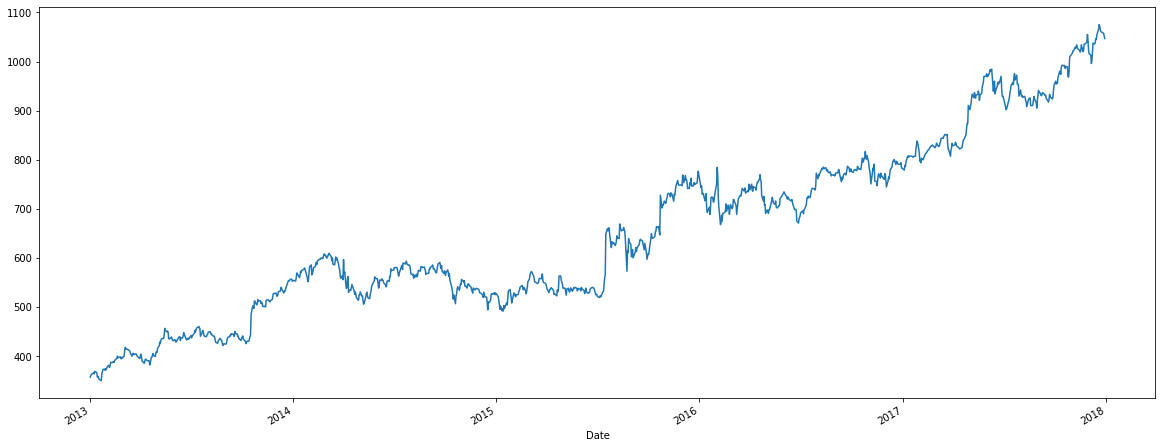

In [4]:
dataset['Open'].plot(figsize=(20,8))

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [6]:
#converting the datatype from int64 to float64
dataset["Volume"] = dataset["Volume"].astype(float)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


In [8]:
#6 days mean
dataset.rolling(6).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-09,362.388845,365.491994,360.038299,363.557078,363.557078,4.354550e+06
2013-01-10,364.327072,366.982300,361.441671,365.066427,365.066427,4.117817e+06
2013-01-11,365.740382,367.851644,362.731618,366.417638,366.417638,3.771233e+06
2013-01-14,366.374588,367.912084,362.290324,365.198898,365.198898,3.804933e+06


<AxesSubplot:xlabel='Date'>

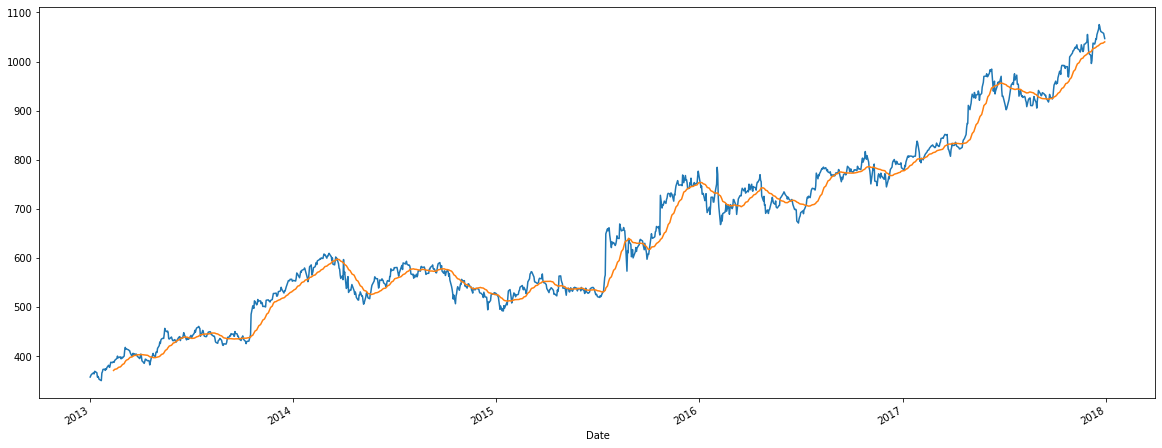

In [9]:
dataset['Open'].plot(figsize=(20,8))
dataset.rolling(window=30).mean()['Close'].plot()

In [10]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [11]:
# scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scale = sc.fit_transform(training_set)

In [12]:
# Created Data Sets
xtrain = []
ytrain = []
for i in range(60,1258):
    xtrain.append(training_set_scale[i-60:i,0])
    ytrain.append(training_set_scale[i,0])
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

xtrain = np.reshape(xtrain, (xtrain.shape[0],xtrain.shape[1],1))

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [14]:
#RNN
regressor = Sequential()

In [15]:
# First LSDM layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (xtrain.shape[1],1)))
regressor.add(Dropout(0.2))
#sec LSDM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#third LSDM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#forth LSDM layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
#outputs
regressor.add(Dense(units=1))

In [16]:
#compiler
regressor.compile(optimizer='adam', loss='mean_squared_error')

#fillting
regressor.fit(xtrain,ytrain, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 19s 60ms/step - loss: 0.0693 0s - loss: 0.071
Epoch 2/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0044
Epoch 4/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0035
Epoch 5/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0037
Epoch 6/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0033
Epoch 7/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0030
Epoch 8/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0033
Epoch 9/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0032
Epoch 10/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0027
Epoch 11/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0028
Epoch 12/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0032
Epoch 1

38/38 [==============================] - 2s 64ms/step - loss: 9.4018e-04


In [17]:
dataset_test = pd.read_csv(r"C:\Users\hp\Desktop\Stock Predictor\testset.xls",index_col="Date",parse_dates=True)

In [18]:
real_price = dataset_test.iloc[:,1:2].values

In [19]:
dataset_test.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600
2018-01-09,1109.400024,1110.569946,1101.230957,1106.260010,1106.260010,902500
2018-01-10,1097.099976,1104.599976,1096.109985,1102.609985,1102.609985,1042800
2018-01-11,1106.300049,1106.525024,1099.589966,1105.520020,1105.520020,978300
2018-01-12,1102.410034,1124.290039,1101.150024,1122.260010,1122.260010,1720500


In [20]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125 entries, 2018-01-02 to 2018-06-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       125 non-null    float64
 1   High       125 non-null    float64
 2   Low        125 non-null    float64
 3   Close      125 non-null    float64
 4   Adj Close  125 non-null    float64
 5   Volume     125 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 6.8 KB


In [21]:
dataset_test["Volume"] = dataset_test["Volume"].astype(float)

In [22]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125 entries, 2018-01-02 to 2018-06-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       125 non-null    float64
 1   High       125 non-null    float64
 2   Low        125 non-null    float64
 3   Close      125 non-null    float64
 4   Adj Close  125 non-null    float64
 5   Volume     125 non-null    float64
dtypes: float64(6)
memory usage: 6.8 KB


In [23]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [24]:
dataset_total = pd.concat((dataset['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
xtest=[]
for i in range(60,185):
    xtest.append(inputs[i-60:i,0])
xtest = np.array(xtest)
xtest = np.reshape(xtest, (xtest.shape[0],xtest.shape[1],1))
predicted_price = regressor.predict(xtest)
predicted_price = sc.inverse_transform(predicted_price)

In [25]:
predicted_price = pd.DataFrame(predicted_price)
predicted_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       125 non-null    float32
dtypes: float32(1)
memory usage: 628.0 bytes


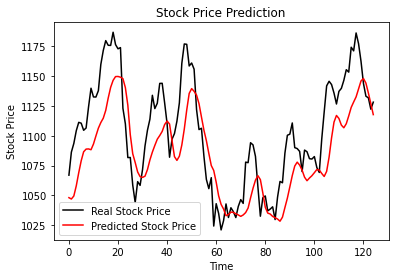

In [26]:
plt.plot(real_price, color = 'black',label = 'Real Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price' )
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()